In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#reading the file
df = pd.read_csv("Salary_Data.csv")
#show the first few rows
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info() #this reveals basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**From the  above information we can see that we have two column and 30 rows, its a pretty clean and consized data that can be easily explored.Next, We have to figure out our independent and dependent variable.**
 - Dependent variables are the variable we hope to predict
 - Independent variables is the explanatory variable 

**In our case the dependent variable is the salary we hope to find based of the years of experience of the individual the years of experinece is the independent variable.**


In [4]:
#we properly divide the data 
train_x=np.asanyarray(df[["YearsExperience"]])
train_y=np.asanyarray(df[["Salary"]])
train_x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [5]:
#we assume abituary values for a and b
#we define the function linear with the formulars of the basic linear equation
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def linear(x):
   y = a*x + b
   return y

In [6]:
#defining a loss function
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))

In [9]:
learning_rate = 0.01
train_data = []
loss_values = []
a_values = []
b_values = []

learning_epoch = 100
#training model
for epoch in range(learning_epoch):
    with tf.GradientTape() as tape:
        y_predicted = linear(train_x)
        loss_value = loss_object(train_y, y_predicted)
        loss_values.append(loss_value)
        
        gradient = tape.gradient(loss_value, [b,a])
        #print(np.array(gradient))
        
        #computing and adjusting the weights
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        
        #trying to find the values of a and b that minimizes the loss function
        b.assign_sub(gradient[0]*learning_rate)
        a.assign_sub(gradient[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

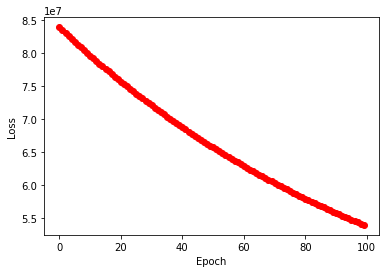

In [10]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

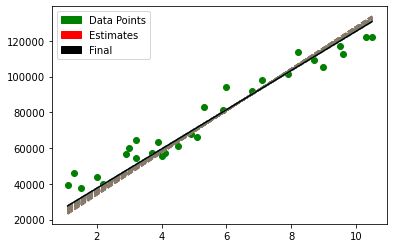

In [11]:
plt.scatter(train_x, train_y, color = "green")
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x, a * train_x + b, linestyle = "dashed")
plt.plot(train_x, a_values[-1] * train_x + b_values[-1], color = "black")

import matplotlib.patches as mpatches

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()